In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from geneview import venn


## Minimal venn plot example

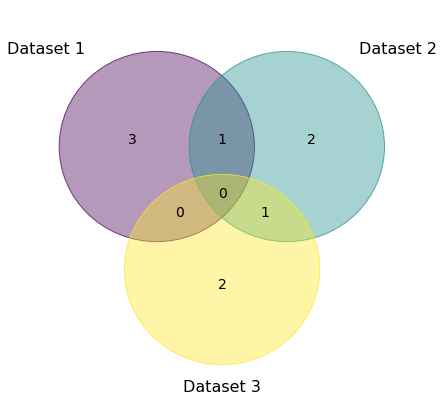

In [3]:
musicians = {
    "Dataset 1": {"A", "B", "D", "E"},
    "Dataset 2": {"C", "F", "B", "G"},
    "Dataset 3": {"J", "C", "K"}
}
ax = venn(musicians)  # the list names of petals are set to be the `list(musicians.keys())` by default.



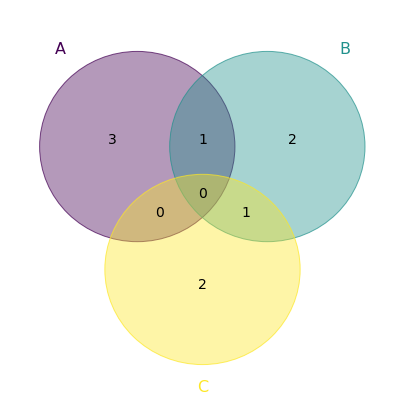

In [4]:
# Rename the labels for each petal by manual.
ax = venn(musicians, names=["A", "B", "C"], legend_use_petal_color=True)

## Examples of Venn diagrams for various numbers of sets

Venn diagrams can be plotted for 2, 3, 4, or 5 sets using ellipses, and for 6 sets using triangles.

The venn() function accepts optional arguments dataset, dataset_labels, cmap, alpha, fontsize, legend_loc, figsize, and ax.
cmap can be either a name of a matplotlib colormap or a list of color names.
fmt is a Python 3 style format string that understands {size}, {percentage}, and {logic}.
legend_loc defaults to "upper right"; to disable the legend altogether, pass legend_loc=None.
figsize only has effect when ax=None; otherwise the diagram is plotted onto an existing axes and figsize is ignored.

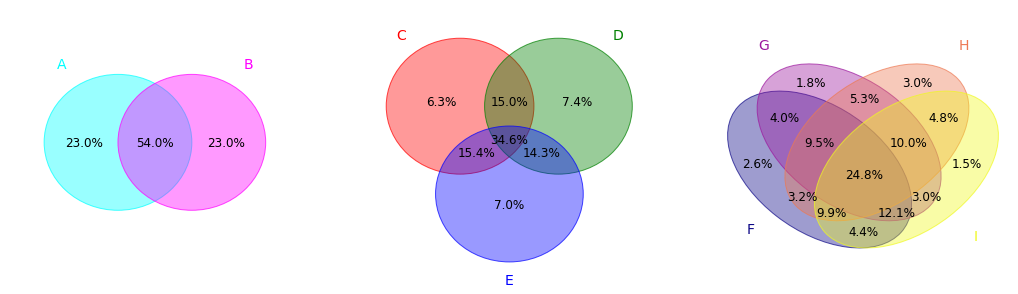

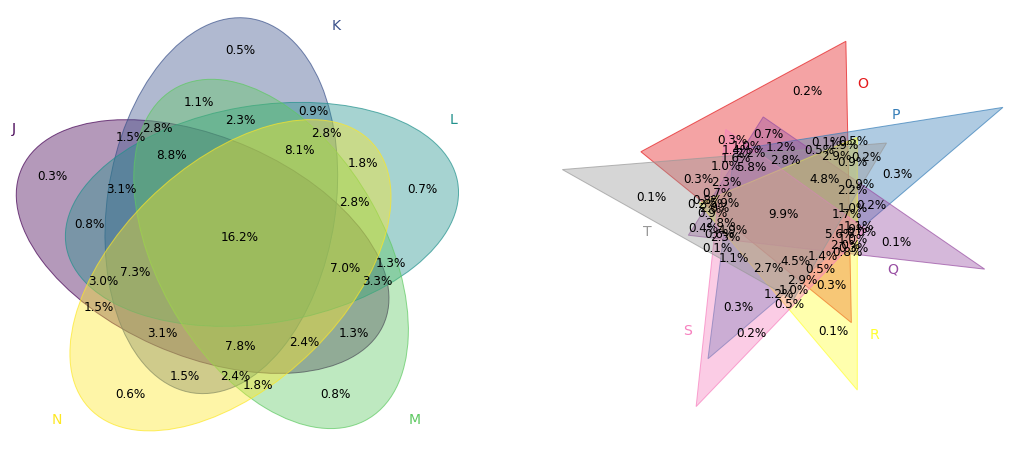

In [5]:
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice

_, top_axs = plt.subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)

for n_sets, cmap, ax in zip(range(2, 7), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(1000, 700, replace=False))
        for name in islice(letters, n_sets)
    }
    venn(dataset_dict,
         fmt="{percentage:.1f}%", # "{size}", "{logic}"
         palette=cmap,
         fontsize=12,
         legend_use_petal_color=True,
         # legend_loc="upper left",
         ax=ax)


## Manual adjustment of petal labels
If necessary, the labels on the petals (i.e., various intersections in the Venn diagram) can be adjusted manually.

For this, generate_petal_labels() can be called first to get the petal_labels dictionary, which can be modified.

After modification, pass petal_labels to functions `venn()`.


In [6]:
from geneview import generate_petal_labels
dataset_dict = {
    name: set(choice(1000, 250, replace=False))
    for name in list("ABCD")
}

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{logic}\n({percentage:.1f}%)") 
# petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}\n({percentage:.1f}%)") 
petal_labels

{'0001': '0001\n(16.3%)',
 '0010': '0010\n(17.0%)',
 '0011': '0011\n(4.8%)',
 '0100': '0100\n(13.0%)',
 '0101': '0101\n(4.8%)',
 '0110': '0110\n(5.4%)',
 '0111': '0111\n(2.0%)',
 '1000': '1000\n(16.0%)',
 '1001': '1001\n(4.2%)',
 '1010': '1010\n(4.1%)',
 '1011': '1011\n(1.0%)',
 '1100': '1100\n(6.1%)',
 '1101': '1101\n(2.9%)',
 '1110': '1110\n(1.8%)',
 '1111': '1111\n(0.4%)'}

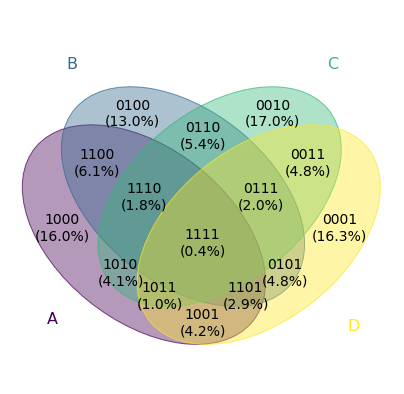

In [7]:
ax = venn(data=petal_labels, names=list(dataset_dict.keys()), legend_use_petal_color=True)


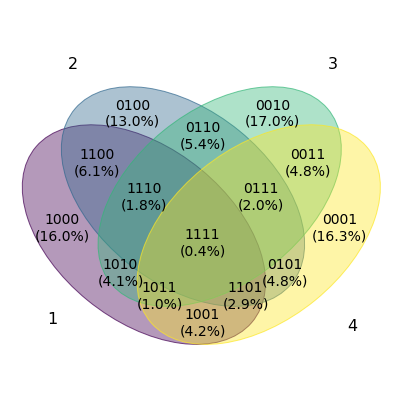

In [8]:
ax = venn(data=petal_labels, names=[1,2,3,4], legend_use_petal_color=False)


In [9]:
dataset_dict = {name: set(choice(1000, 250, replace=False)) for name in list("αβγ")}
petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}") 

significance_filter = lambda value: value if int(value) >= 45 else "ns"
petal_labels = {logic: significance_filter(value) for logic, value in petal_labels.items()}
for logic in "001", "010", "100":
    del petal_labels[logic]

petal_labels


{'011': 'ns', '101': '48', '110': '50', '111': 'ns'}

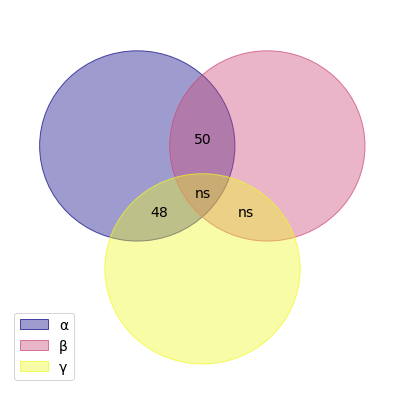

In [10]:
ax = venn(data=petal_labels, names=list(dataset_dict.keys()), palette="plasma", legend_loc="best")
